In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import sys
sys.path.append('/Users/af/Work/Cosmo/codes/1d/build')
#sys.path.append('/Users/af/Work/Cosmo/codes/1d/debug')
print(sys.path)
import extruct
import numpy as np
import matplotlib.pyplot as plt



['/Users/af/Work/Cosmo/codes/1d', '/Users/af/miniconda3/envs/cobenv/lib/python37.zip', '/Users/af/miniconda3/envs/cobenv/lib/python3.7', '/Users/af/miniconda3/envs/cobenv/lib/python3.7/lib-dynload', '', '/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages', '/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages/IPython/extensions', '/Users/af/.ipython', '/Users/af/Work/Cosmo/codes/1d/build']


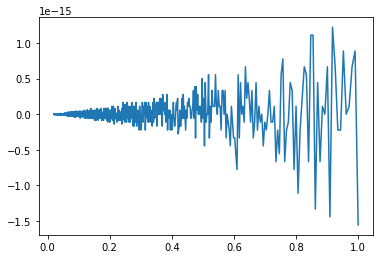

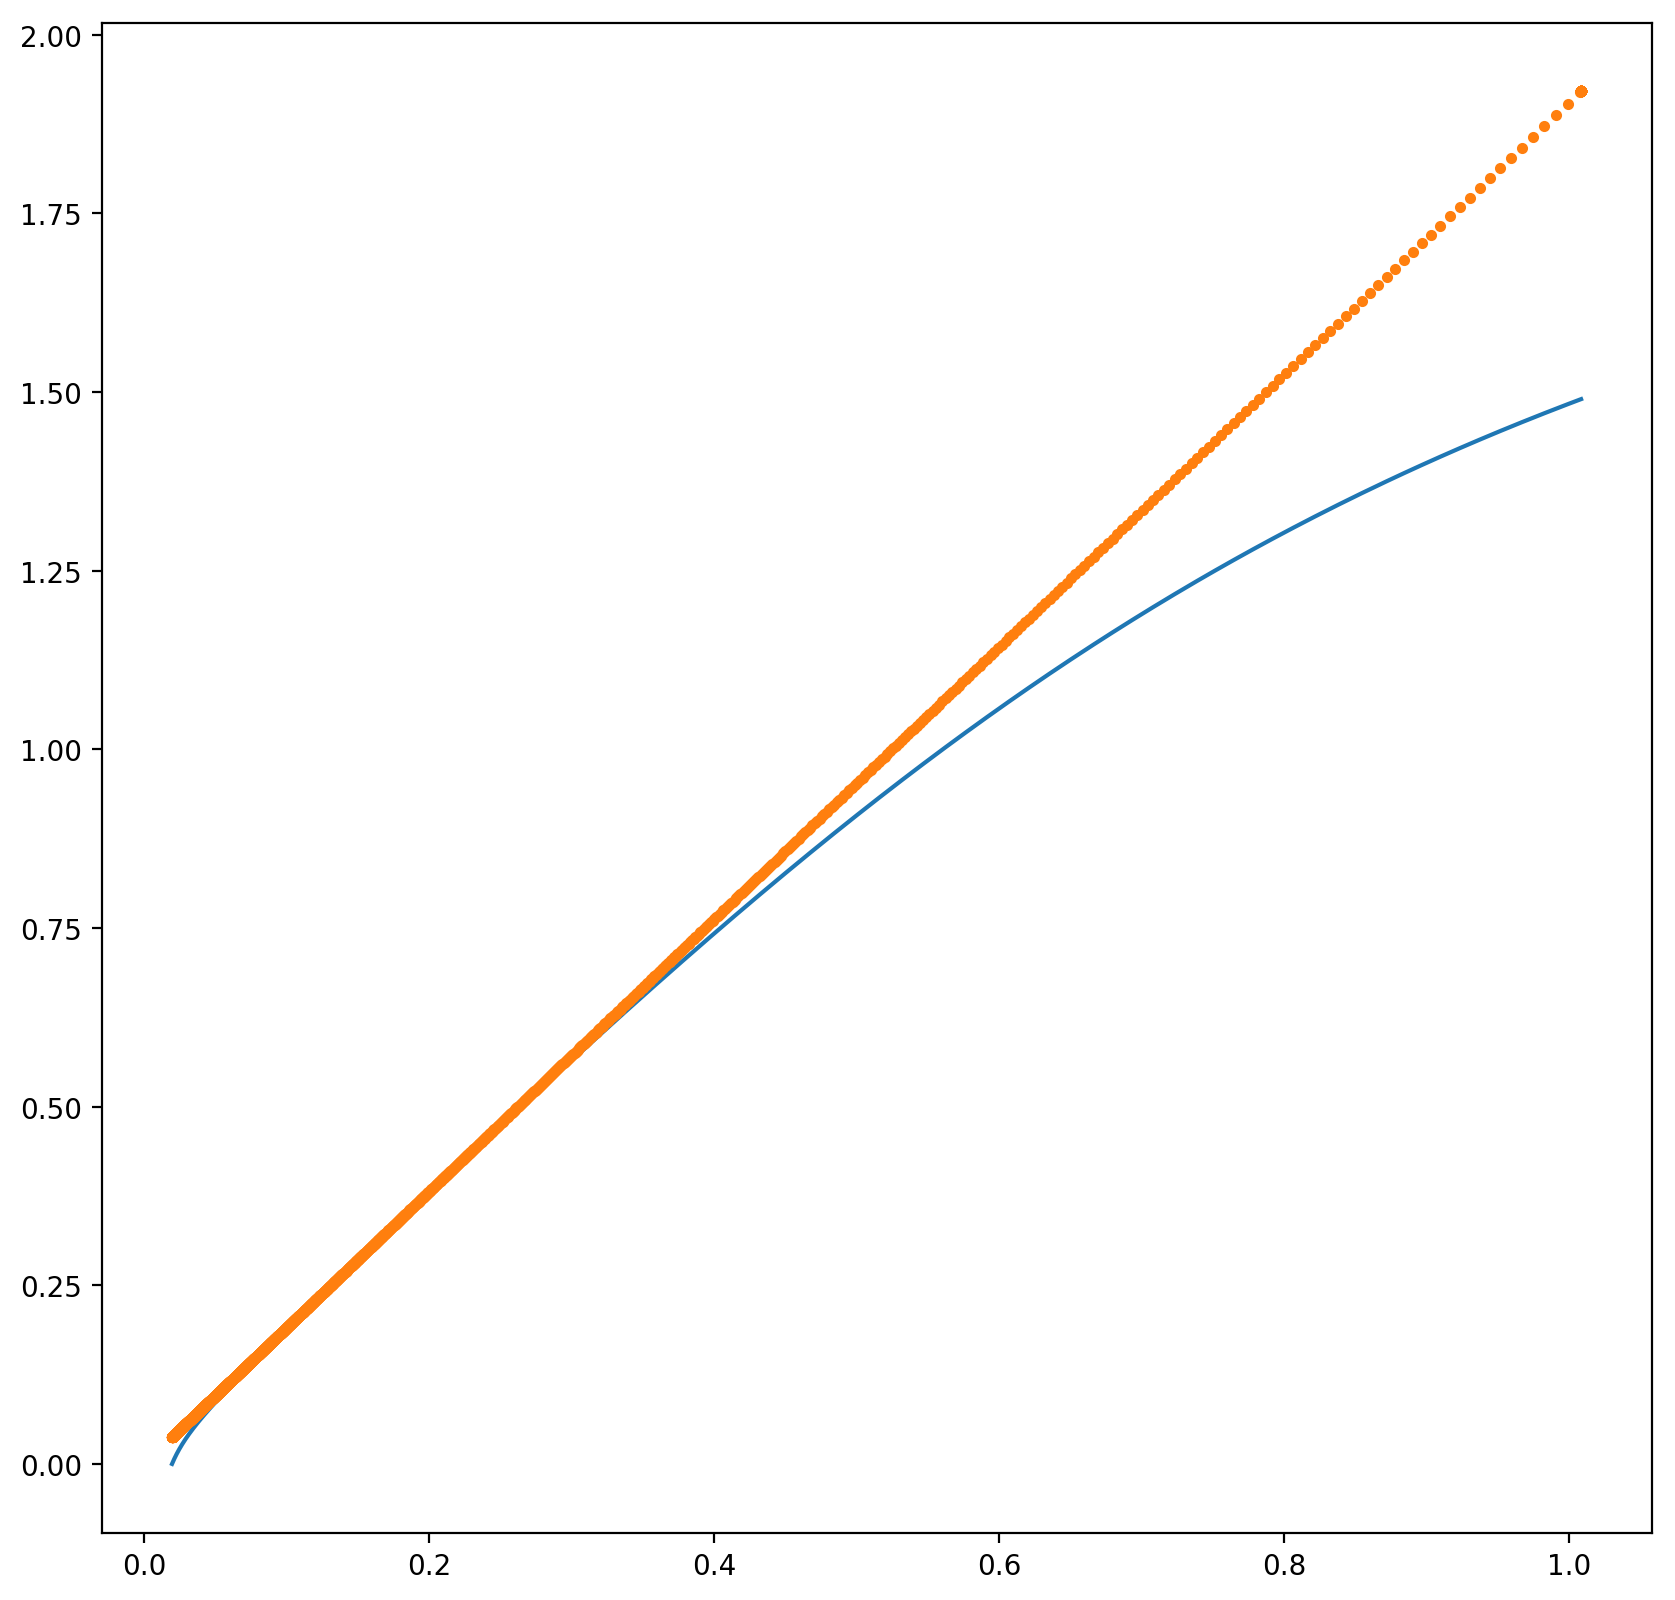

In [3]:
h = 0.7
Om = 0.3
bg = extruct.Background()
bg = extruct.Background(50, 0, Om, h, 0)
bg.integrate()
N = 5000
a = np.zeros(N)
a2 = np.zeros(N)
t = np.zeros(N)
D1 = np.zeros(N)
D2 = np.zeros(N)
i = 0
taufin = 60
for tau in np.linspace(0,taufin,N): 
    a[i] = bg.getScaleFactor(tau)
    D1[i] = bg.getD1(tau)
    D2[i] = bg.getD2(tau)
    t[i] = bg.getPhysTime(tau)
    i = i+1
    
zs = np.linspace(50,0,N)
i = 0
for z in zs:
    a2[i] = bg.getAOfZ(z)
    i = i+1
    
plt.plot(a2, a2-1/(1+zs))
plt.show()
plt.figure(figsize=(10, 10), dpi= 200)
plt.plot(a, D1)
plt.plot(a, 0.4*a/h/Om, '.')
plt.show()

#plt.figure(figsize=(10, 10), dpi= 200)
#plt.semilogy(a, D2)
#plt.semilogy(a, np.sqrt(Om/a**3 + 1 - Om), '.')

#plt.figure(figsize=(10, 10), dpi= 200)
#plt.plot(a, np.gradient(np.gradient(D1))/(taufin/N)**2)
#plt.plot(a, 1.5*Om*a*D1*h**2)
#plt.show()

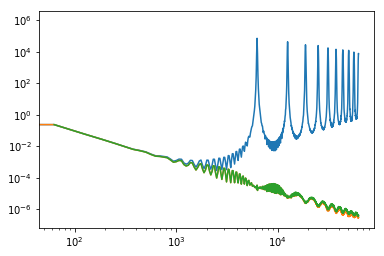

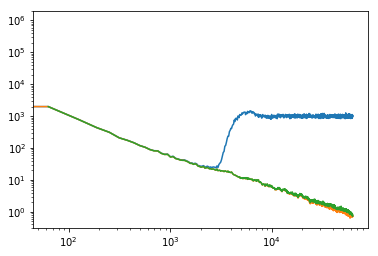

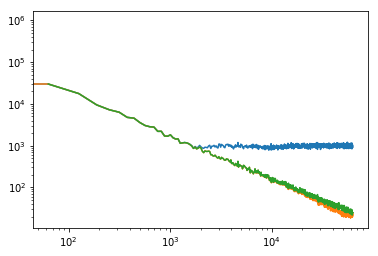

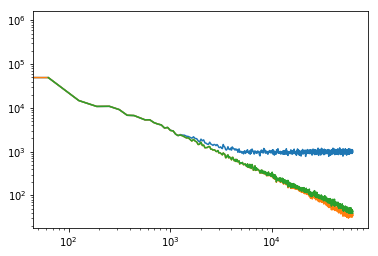

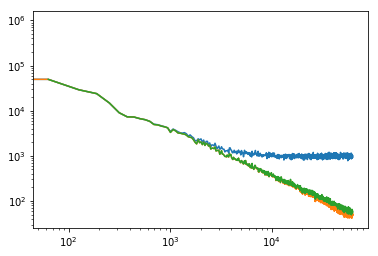

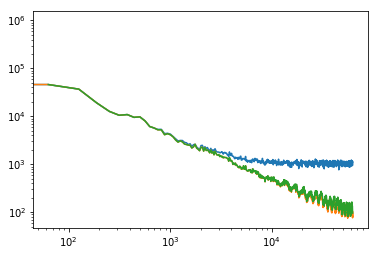

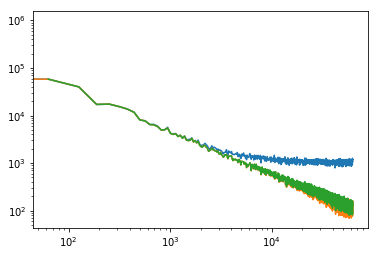

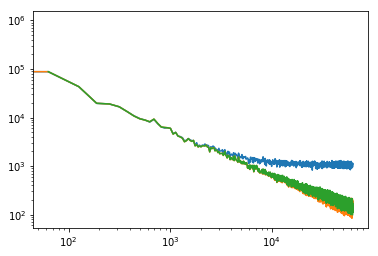

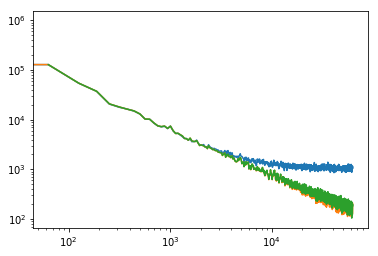

In [8]:
god = extruct.Multiverse(15)

pspec = extruct.PowerLaw()

zin = 100
zfin = 0
h = 0.7
Om = 0.3
Oc = 0
L = 1 

bg = extruct.Background(zin, zfin, Om, h, Oc)
bg.integrate()
#pspec.A = 0.00000000004
pspec.A = 0.000003

zin = 100
for i in range(1,200):
    god.bang(1000, bg, pspec, L, 1) 
  
#m_den = extruct.DensityObs(100)

#god.measure(uni1, m_den)

denObs = extruct.DensityObs(100)
denObs2 = extruct.DensityObs2(200)
collObs = extruct.CollisionObs(500)
pkObs1 = extruct.PowerSpectrumObs(0,1000,10)
pkObs2 = extruct.PowerSpectrumObs(1,1000,10)
pkObsFFT = extruct.PowerSpectrumObs(2,1000,10)
psdenObs = extruct.PhaseSpaceDensityObs(300)
corrObs = extruct.CorrelationFunctionObs(0, 1000)

for z in [zin-1, 50, 20, 10, 5, 3, 2, 1, 0]:

    god.evolveAll(z)

    god.measureAll(pkObs1)
    god.measureAll(pkObs2)
    god.measureAll(pkObsFFT)
    god.measureAll(denObs)
    god.measureAll(denObs2)
    god.measureAll(psdenObs)
    god.measureAll(collObs)
 #   god.measureAll(corrObs)

    pk1 = pkObs1.getResult()
    pk2 = pkObs2.getResult()
    pkFFT = pkObsFFT.getResult()
    den = denObs.getResult()
    den2 = denObs2.getResult()
    coll = collObs.getResult()
    psden = psdenObs.getResult()
  #  corr = corrObs.getResult()
  #  psden = psden[3:, :]

#    plt.imshow(np.log(psden.T), interpolation='nearest')
#    plt.show()
    
    plt.loglog(pk1[0,:],pk1[1,:])
    plt.loglog(pkFFT[0,:],pkFFT[1,:])
    plt.loglog(pk2[0,:],pk2[1,:])
    plt.show()
    #plt.plot(pkFFT[0,:],pk2[1,:]/pkFFT[1,:]/2/3.141592)
    plt.show()

 #   plt.plot(coll[0,:]-0.5,coll[1,:])
 #   plt.show()
 #   plt.figure(figsize=(50, 50)) #, dpi= 200)
    
    #plt.plot(den[0,:]-0.5,den[1,:])
#    plt.plot(den2[0,:]-0.5,den2[1,:])
#    plt.show()
    
    #plt.plot(pk[0,:],pk[1,:])
  #  plt.show()
  #  plt.plot(corr[0,:],corr[1,:])
    
   # plt.show()
    
    

In [ ]:
god.evolveAll(0.1)

array([[ 1.5154046e-21,  1.4012985e-45,  1.5216763e-21,  1.4012985e-45,
         1.5216777e-21,  1.4012985e-45,  1.5414283e-44,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  1.1210388e-44,  0.0000000e+00,
         0.0000000e+00,  1.4012985e-45,  8.0282197e-28,  1.4012985e-45,
         0.0000000e+00,  0.0000000e+00, -1.1187908e+33,  4.5833670e-41,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         1.6815582e-44,  1.4012985e-45,  0.0000000e+00,  0.0000000e+00,
         1.6815582e-43,  7.8472714e-44,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.00000

In [8]:
uni1

0